# <font color=darkred> MAT4506</font>

<h1>Pierrick RUGERY</h1>

<h1><center>Kaggle Click-Through Rate Prediction</center></h1>
<h2><center>Predict whether a mobile ad will be clicked</center></h2>

L'objectif est de prédire la probabilité de clic pour chaque annonce du fichier test. Cette probabilité sera utilisée pour prédire le label 'click' égale à 0 ou 1. 

<h1><center>Analyse de donnée Challenge Kaggle </center></h1>

Afin d'éffectuer l'analyse des données du fichier train, nous avons pris 1.000.000 lignes du fichier train.csv (les lignes sont prises de manière aléatoire):  ech_1000000.csv.

Nous avons utilisé la bibliothèque Pandas qui va nous permettre de lire le fichier ech_1000000.csv et propose des opérations de manipulation des données. 

In [1]:
import csv
import pandas as pd
import numpy as np

In [2]:
#load new train file
train= pd.read_csv('./data/ech_1000000.csv')#new file with 1000000 lines that were taken randomly from the initial train file

In [3]:
len(train)

1000000

<h2>La moyenne des clics </h2>

On commence par calculer la moyenne de la colonne 'click' où on trouve des 0 et des 1.

<b>Objectif</b>: Avoir une information sur le nombre d'annonces qui ont été cliquées.

In [4]:
moyenne_click = ((train.click).mean())
moyenne_click

0.169533

<b>Conclusion:</b> Donc parmi toutes les anonces (1000000 annonces), 169533 ont été cliquées.

<h2>Les catégories des sites</h2>

In [5]:
len(train.groupby(['site_category']))

22

On remarque que le nombre de catégories des sites est 22 catégories. Donc c'est un paramètre exploitable qui peut caractériser les annonces. Alors, on calcule la moyenne des clics par catégorie.

In [6]:
#Calculate the mean of the click column for each site category
site_category_click = (train.groupby(['site_category'])['click'].mean())
site_category_click

site_category
0569f928    0.073048
28905ebd    0.206557
335d28a8    0.091094
3e814130    0.284453
42a36e14    0.136364
50e219e0    0.128638
5378d028    0.000000
70fb0e29    0.137990
72722551    0.061871
75fa27f6    0.114352
76b2941d    0.027704
8fd0aea4    0.028902
9ccfa2ea    0.000000
a818d37a    0.000000
bcf865d9    0.000000
c0dd3be3    0.120900
c706e647    0.000000
da34532e    0.000000
dedf689d    0.520478
e787de0e    0.100000
f028772b    0.178973
f66779e6    0.038443
Name: click, dtype: float64

<b>Conclusion:</b> 52% des annonces cliquées figurent dans le site de catégorie 'dedf689d' 

On cherche le nombre de catégories où il y a eu des clics sur les annonces. 

In [7]:
train_click_1 = train[train['click'] == 1] # return all the information (169533 rows × 24 columns) of the adds that were clicked 

In [8]:
site_category_click_1 = train_click_1.groupby('site_category')['click'].mean()
len(site_category_click_1)

16

<b>Conclusion:</b> On remarque qu'il y a 22 catégories de sites. Parmi ces 22 catégories, les annonces qui ont été cliquées figuraient dans 16 catégories de sites. 

<h2>Les catégories des applications </h2>

In [9]:
#Calculate the mean of the click column for each app category
app_category_click = (train.groupby(['app_category'])['click'].mean())
len(app_category_click)

27

On remarque que le nombre de catégories des applications est 27 catégories. Donc c'est un paramètre exploitable qui peut caractériser les annonces. Alors, on calcule la moyenne des clics par catégorie.

In [10]:
app_category_click_1 = train_click_1.groupby('app_category')['click'].mean()
len(app_category_click_1)

21

<b>Conclusion:</b> Il y a 27 catégories d'applications, et 21 catégories ont été utilisées pour cliquer sur les annonces.

<h2>Le type de gadgets utilisés pour cliquer sur les annonces </h2>

On remarque qu'il n'y a que 4 types de gadgets utilisés pour cliquer sur les annonces. C'est un parmètre très important dans un jeu de données d'un million de lignes.

In [11]:
#Calculate the mean of the click column for each device type
device_type_click = (train.groupby(['device_type'])['click'].mean())
len(device_type_click) 

4

In [12]:
device_type_click

device_type
0    0.209100
1    0.169041
4    0.093339
5    0.084730
Name: click, dtype: float64

<b>Conlusions:</b> Les device de type 0 et 1 sont les plus utilisés.

<h2>Le model du gadget utilisé pour cliquer sur les annonces</h2>

Plusieurs modèles des appareils sont listés dans notre jeu de données. Or, ils ne sont pas tous utilisés pour cliquer sur les annonces. Ce calcul nous permet d'avoir une idée sur le nombre de modèle utilisé pour cliquer sur les annonces.'

In [13]:
device_model_click = (train.groupby(['device_model'])['click'].mean())
len(device_model_click)

5146

In [14]:
device_model_click_1 = (train_click_1.groupby(['device_model'])['click'].mean())
len(device_model_click_1)

3551

<b>Conclusion:</b> Parmi les 5146 models de gadgets , 3551 ont été utilisé pour cliquer sur les annonces.

### Position de la banière 

La manière de laquelle l'annonce a été positionnée est aussi importante. 

In [15]:
#Calculate the mean of the click column for each banner_pos
banner_pos_click = (train.groupby(['banner_pos'])['click'].mean())
banner_pos_click

banner_pos
0    0.164284
1    0.182713
2    0.102167
3    0.166667
4    0.161458
5    0.125828
7    0.309501
Name: click, dtype: float64

<b>Conclusion:</b> 30% des annonces ont été positionnées suivant une position caractérisée par le chiffre 7.

<h2> Corrélation entre les variables </h2>

In [16]:
#standar correlation coefficient'pearson
train.corr('pearson')

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
id,1.000000,0.000098,0.001054,-0.001385,-0.000482,-0.001733,0.000804,0.000745,-0.000201,-0.001105,0.000267,-0.001295,-0.000841,0.000355,-0.000541
click,0.000098,1.000000,-0.008504,-0.037246,0.024348,-0.038525,-0.081544,-0.059245,-0.032410,0.131150,-0.054896,0.021798,-0.006088,-0.058882,-0.069599
hour,0.001054,-0.008504,1.000000,-0.005024,0.027024,-0.005039,0.051984,0.195280,0.021576,0.001724,0.185750,0.013198,0.041953,0.025502,0.065478
C1,-0.001385,-0.037246,-0.005024,1.000000,0.287128,0.894442,0.196485,0.055689,0.126584,0.062968,0.064037,-0.042336,0.002051,-0.035630,0.036387
banner_pos,-0.000482,0.024348,0.027024,0.287128,1.000000,0.322318,-0.084460,-0.014276,0.066742,0.022722,-0.033952,0.095511,0.132478,0.055278,-0.097912
device_type,-0.001733,-0.038525,-0.005039,0.894442,0.322318,1.000000,0.209540,0.044408,0.189696,0.065872,0.050376,-0.046712,-0.002733,-0.049322,0.036892
device_conn_type,0.000804,-0.081544,0.051984,0.196485,-0.084460,0.209540,1.000000,0.067575,0.069114,-0.015162,0.080164,-0.063068,-0.010624,0.089179,0.063271
C14,0.000745,-0.059245,0.195280,0.055689,-0.014276,0.044408,0.067575,1.000000,0.003280,0.037223,0.976817,-0.230206,-0.130668,0.023699,0.409256
C15,-0.000201,-0.032410,0.021576,0.126584,0.066742,0.189696,0.069114,0.003280,1.000000,-0.069181,0.002045,0.012955,0.050012,0.008188,0.002263
C16,-0.001105,0.131150,0.001724,0.062968,0.022722,0.065872,-0.015162,0.037223,-0.069181,1.000000,0.047485,0.083541,-0.074303,-0.045196,-0.084270


La plupart des données ont été hashées.
Il n'y a aucune corrélation entre les différents paramètres. 

<h2><u> Bilan:</u></h2> 

Présentation graphique de la moyenne des clics en fonction des catégories de site.

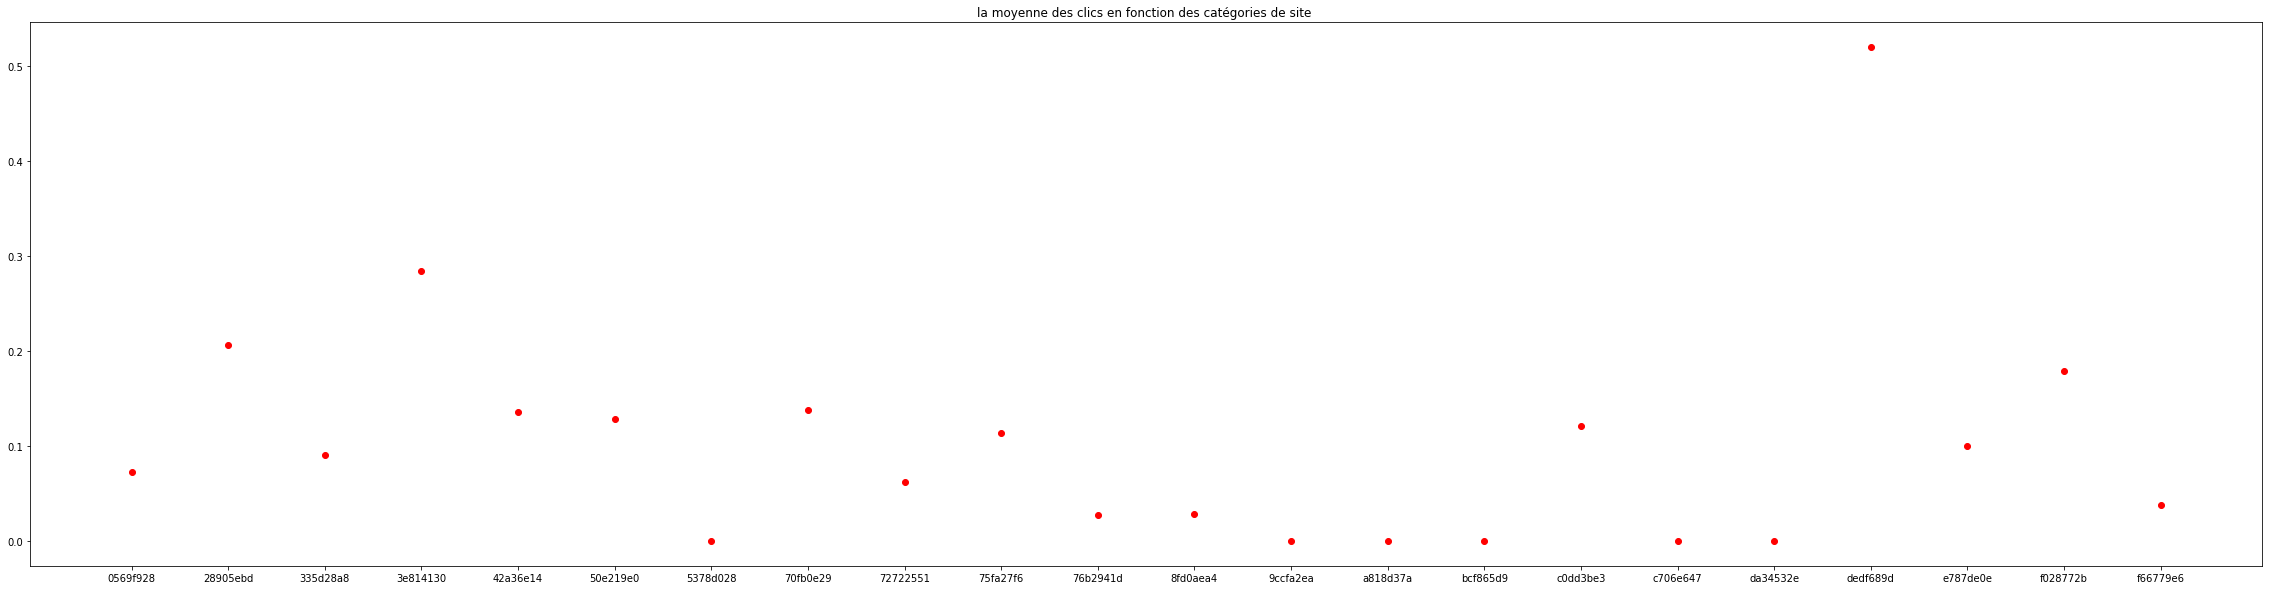

In [17]:
import matplotlib.pyplot as plt

l=[]
for i in range(len(site_category_click)):
    l.append(site_category_click[i])
    
fig = plt.figure(1, figsize=(40,10))
W = site_category_click.index.get_level_values('site_category')
W = list(W)
x = [i for i in range(1,len(W)+1)]
plt.xticks(x , W)
plt.plot(x, l, 'ro')
plt.title('la moyenne des clics en fonction des catégories de site ')
plt.show()

Présentation graphique de la moyenne des clics en fonction des catégories des applications.

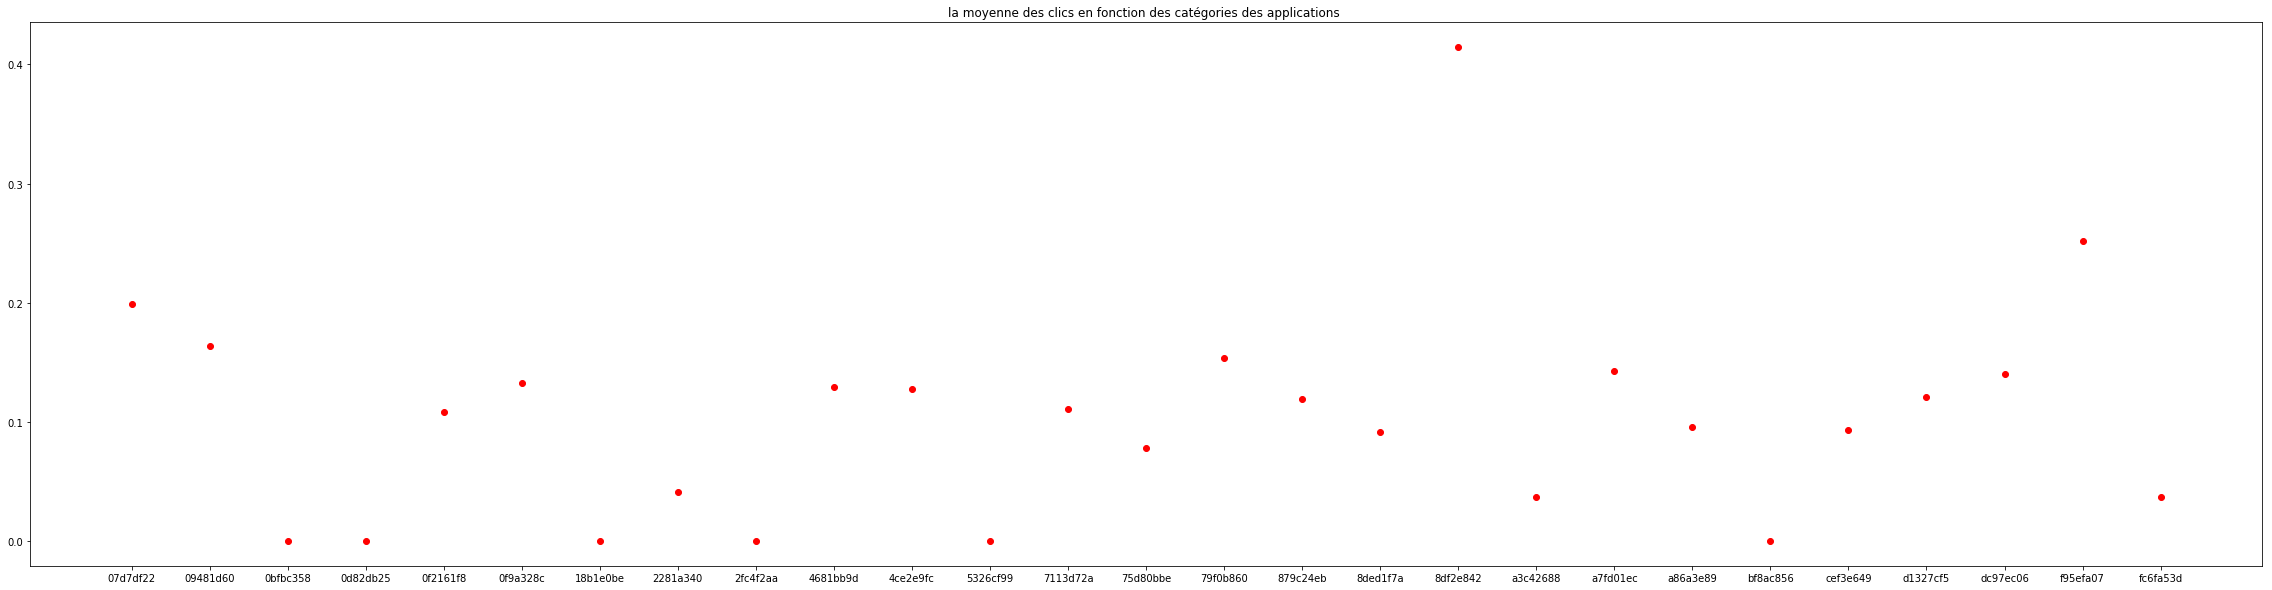

In [18]:
l=[]
for i in range(len(app_category_click)):
    l.append(app_category_click[i])
    
fig = plt.figure(1, figsize=(40,10))
A = app_category_click.index.get_level_values('app_category')
A = list(A)
x = [i for i in range(1,len(A)+1)]
plt.xticks(x , A)
plt.plot(x, l, 'ro')
plt.title('la moyenne des clics en fonction des catégories des applications ')
plt.show()

Présentation graphique de la moyenne des clics en fonction des quatres types de gadget.

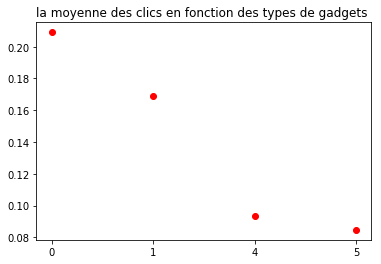

In [19]:
l=[]
G = device_type_click.index.get_level_values('device_type')
G = list(G)
for i in list(G):
    l.append(device_type_click[i])    
#fig = plt.figure(1, figsize=(40,10))
x = [i for i in range(1,len(G)+1)]
plt.xticks(x , G)
plt.plot(x, l, 'ro')
plt.title('la moyenne des clics en fonction des types de gadgets ')
plt.show()

Présentation graphique de la moyenne des clics en fonction des positions de la bannière.

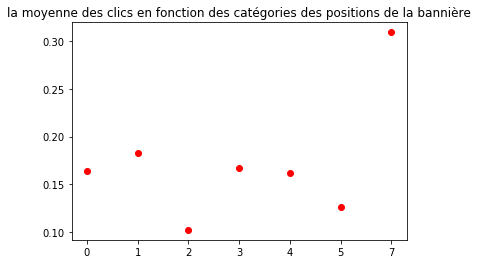

In [20]:
l=[]
B = banner_pos_click.index.get_level_values('banner_pos')
B = list(B)
for i in list(B):
    l.append(banner_pos_click[i])    
#fig = plt.figure(1, figsize=(40,10))
B = list(B)
x = [i for i in range(1,len(B)+1)]
plt.xticks(x , B)
plt.plot(x, l, 'ro')
plt.title('la moyenne des clics en fonction des catégories des positions de la bannière')
plt.show()

<h1><center>Feature engineering </center></h1>

Nous avons pris 100.000 lignes du fichier test.csv (les lignes sont prises de manière aléatoire):  ech_test_100000.csv.

In [21]:
#load new test file
test = pd.read_csv('data/ech_test_100000.csv')

On retire des informations de la colonne hour: la date et l'heure.

In [22]:
train['day'] = train['hour'].apply(lambda x: (x - x % 10000) / 1000000)  # day
train['dow'] = train['hour'].apply(lambda x: ((x - x % 10000) / 1000000) % 7)  # day of week
train['time'] = train['hour'].apply(lambda x: x % 10000 / 100)  # hour
test['day'] = test['hour'].apply(lambda x: (x - x % 10000) / 1000000)  # day
test['dow'] = test['hour'].apply(lambda x: ((x - x % 10000) / 1000000) % 7)  # day of week
test['time'] = test['hour'].apply(lambda x: x % 10000 / 100)  # hour

In [23]:
for col in ['C18', 'C20', 'C21']:
    # keep only the ones that are within +3 to -3 standard deviations in the column col,
    train = train[np.abs(train[col] - train[col].mean()) <= (3 * train[col].std())]
    test = test[np.abs(test[col] - test[col].mean()) <= (3 * test[col].std())]
    # or if you prefer the other way around
    train = train[~(np.abs(train[col] - train[col].mean()) > (3 * train[col].std()))]
    test = test[~(np.abs(test[col] - test[col].mean()) > (3 * test[col].std()))]

On ajoute cinq nouvelles colonnes :
    - site: regroupe toutes les informations sur chaque site.
    - app: regroupe toutes les informations sur chaque app.
    - device: regroupe toutes les informations sur chaque appareil.
    - type: regroupe toutes les informations de deux caractéristiques de type d'appareil'.
    - C: regroupe toutes les informations sur les catégories anonymes.

In [24]:
#creating a new column filled with the values of three columns   
train['site'] = train['site_id'].values + train['site_domain'].values + train['site_category'].values
test['site']  = test['site_id'].values + test['site_domain'].values + test['site_category'].values

train['app']  = train['app_id'].values + train['app_domain'].values + train['app_category'].values
test['app']= test['app_id'].values + test['app_domain'].values + test['app_category'].values

train['device']= train['device_id'].values + train['device_ip'].values+ train['device_model'].values
test['device'] = test['device_id'].values + test['device_ip'].values + test['device_model'].values

#creating a new column filled with the values of two columns   
train['type']= train['device_type'].values + train['device_conn_type'].values
test['type'] = test['device_type'].values + test['device_conn_type'].values 

#creating a new column filled with the values of five columns   
train['C']= train['C14'].values + train['C15'].values+ train['C16'].values+ train['C17'].values+ train['C19'].values
test['C'] = test['C14'].values + test['C15'].values + test['C16'].values+ test['C17'].values+ test['C19'].values

On ajoute à toutes les valeurs le nom de la colonne correpondantes. Ensuite, nous appliquons la fonction de hash. On utilise la méthode du double hashing, pour réduire les collisions.

In [25]:
import hashlib
#Adding to each value the name of its column and applying a hash function
for col in ['id', 'C1', 'banner_pos', 'device_type', 'device_conn_type','C14', 'C15', 'C16', 'C17',  'C19',  'day','dow','time','site_id', 'site_domain',
            'site_category', 'app_id', 'app_domain', 'app_category', 'device_model',
            'device_id', 'device_ip', 'site', 'app', 'device', 'type','C18', 'C20', 'C21', 'C']:
    train[col] = train[col].apply(lambda x : col + str(x))
    train[col] = train[col].apply(lambda x: 9973-(hash(x)%9973))
    test[col] = test[col].apply(lambda x : col + str(x))
    test[col] = test[col].apply(lambda x: 9973-(hash(x)%9973))

In [26]:
from sklearn.preprocessing import *
#Encode labels with value between 0 and n_classes-1.
le = LabelEncoder()
for col in ['site', 'app', 'device', 'type']:
    le.fit(list(train[col])+ list(test[col]))
    train[col] = le.transform(train[col])
    test[col] = le.transform(test[col])

Nous avons choisi d'utiliser get_dummies afin de convertir les variables catégoriques en plusieurs variables qui prennent des valeurs 0 ou 1. Les variables banner_pos, device_type présentent les variables où il y a le moins de catégories.

In [27]:
#Convert categorical variable into dummy/indicator variables

train = pd.get_dummies(train, columns=['banner_pos','device_type'], drop_first = True)
test = pd.get_dummies(test, columns=['banner_pos','device_type'], drop_first = True)

Nous allons utiliser tous les features.

In [28]:
features_train = list(train.columns.values)
features_test = list(test.columns.values)
features_train.remove('click')
features_test.remove('click')

In [29]:
len(features_test)

38

<h1><center>Application des GLM</center></h1>

In [30]:
from sklearn.linear_model import *
from sklearn.metrics import *

In [31]:
#using logistic regression method to predict the probability of clics
logModel = LogisticRegression()
logModel.fit(np.array(train[list(features_train)]), train.click)
predictions = logModel.predict_proba(np.array(test[features_test]))
print(log_loss(test.click.values, predictions))

0.443698758693


In [32]:
predictions

array([[ 0.75005273,  0.24994727],
       [ 0.84747433,  0.15252567],
       [ 0.73446382,  0.26553618],
       ..., 
       [ 0.74574596,  0.25425404],
       [ 0.8215962 ,  0.1784038 ],
       [ 0.82994835,  0.17005165]])

<h1><center>Application des modèles ensemblistes</center></h1>

In [34]:
from sklearn.ensemble import GradientBoostingClassifier


gradientModel = GradientBoostingClassifier()
gradientModel.fit(np.array(train[list(features_train)]), train.click)
predictions_gradient = gradientModel.predict_proba(np.array(test[features_test]))
print(log_loss(test.click.values, predictions_gradient))

0.416742401848


In [41]:
import csv
from  sklearn.ensemble  import  RandomForestClassifier 

clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=16, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
clf = clf.fit(np.array(train[list(features_train)]), train.click)
predictions = clf.predict_proba(np.array(test[features_test]))
print(clf.predict_proba(np.array(test[features_test])))
print(log_loss(test.click.values, predictions))
ids = test['id']
predic = predictions[:,1]
with open("submission.csv", "w") as fwrite:
    writer = csv.writer(fwrite,delimiter=' ')
    writer.writerow(['id', 'click'])
    for i in range(len(ids)):
        writer.writerow([ids[i],predic[i]])
    


[[ 0.69997014  0.30002986]
 [ 0.82571599  0.17428401]
 [ 0.6315233   0.3684767 ]
 ..., 
 [ 0.81643359  0.18356641]
 [ 0.81841742  0.18158258]
 [ 0.91171806  0.08828194]]
0.404638437009


In [36]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

adaboostModel = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(),n_estimators=50, learning_rate=0.00001)
adaboostModel.fit(np.array(train[list(features_train)]), train.click)  
prediction1 = adaboostModel.predict_proba(np.array(test[features_test]))
print(log_loss(test.click.values, prediction1))


7.27358333598


Parmi les modèles précédents, on garde le modèle de forêt aléatoire qui minimise le plus la fonction log_loss. Le réultat final est un fichier csv qui contient la probabilité prédite de clics pour chaque annonce du fichier test: submission.csv